# Simple and Multiple Linear Regression:

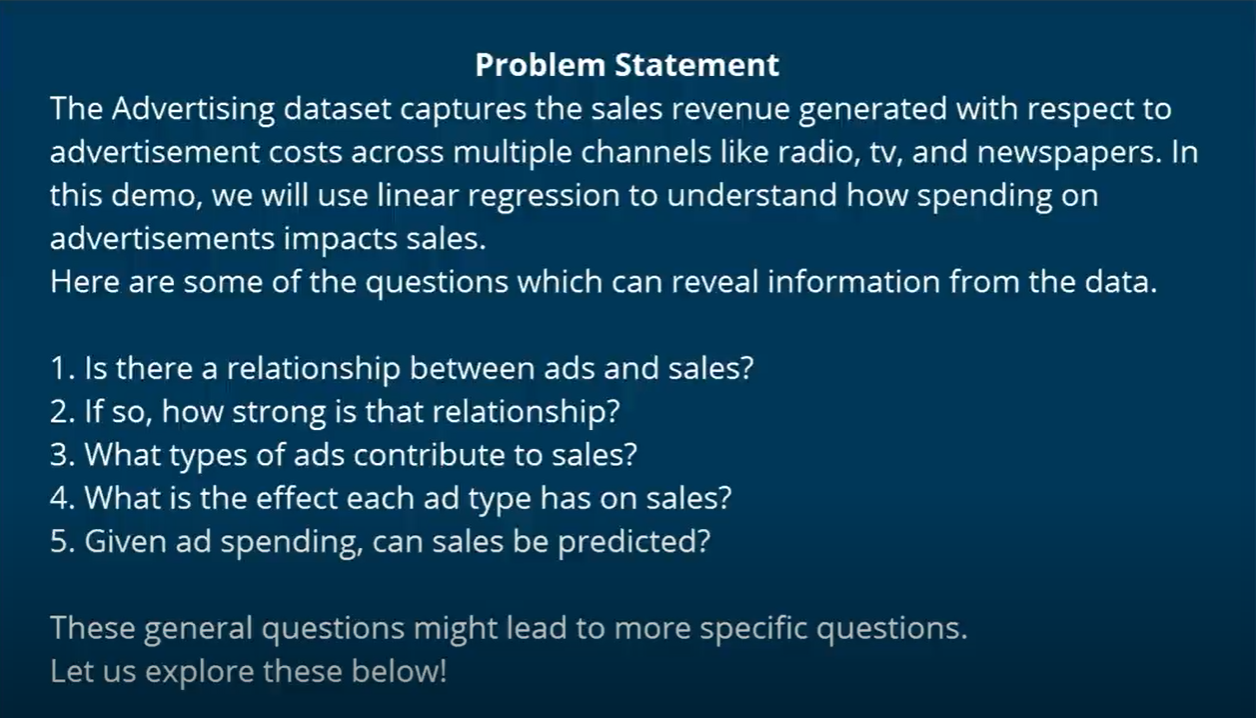

## Solution:

In [60]:
# Importing Necessary Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error

In [62]:
# Importing Data

In [63]:
df = pd.read_csv("Advertising.csv")

In [64]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [65]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [67]:
df.shape

(200, 5)

In [68]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [69]:
df["Unnamed: 0"].value_counts()

1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: Unnamed: 0, Length: 200, dtype: int64

In [70]:
# We can drop "Unnamed: 0" column as it contains only unique ids. 

In [71]:
df = df.drop("Unnamed: 0", axis= 1)

In [72]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [73]:
# Plotting Relationship of Independent Variables with Dependent Variable

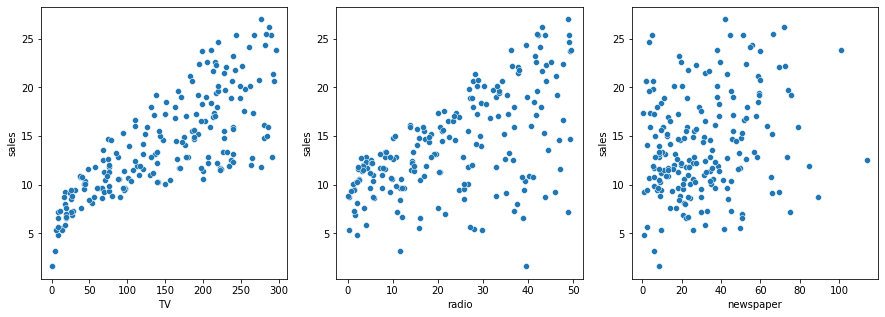

In [74]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.scatterplot(data= df, x= "TV", y= "sales", ax= ax[0])
sns.scatterplot(data= df, x= "radio", y= "sales", ax= ax[1])
sns.scatterplot(data= df, x= "newspaper", y= "sales", ax= ax[2])

plt.show()

## Simple Linear Regression:

In [75]:
# Here, we will take One Independent Variable to Predict Sales (Dependent Variable).

In [76]:
# Independent Variable / Feature
X = df[["TV"]]

In [77]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [78]:
# Dependent Variable / Target
y = df["sales"]

In [79]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [80]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [82]:
# Building Model Using OLS:

simple_lr_1 = OLS(y_train, X_train)

In [83]:
simple_lr_1 = simple_lr_1.fit()

In [84]:
simple_lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              1413.
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                    5.29e-81
Time:                        14:59:12   Log-Likelihood:                         -476.95
No. Observations:                 160   AIC:                                      955.9
Df Residuals:                     159   BIC:                                      959.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0826      0.002     37.586      0.000       0.078       0.087
==============================================================================
Omnibus:                       16.124   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.460
Skew:                          -0.830   Prob(JB):                     9.80e-05
Kurtosis:                       3.113   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# Building Model using Linear Regression:

simple_lr_2 = LinearRegression()

In [86]:
simple_lr_2.fit(X_train, y_train)

LinearRegression()

In [88]:
simple_lr_2.coef_

array([0.04652973])

In [89]:
simple_lr_2.intercept_

7.1196384305929525

## Multiple Linear Regression:

In [ ]:
# Here, we will take all Independent Variables to Predict Sales (Dependent Variable).

In [90]:
X = df.drop("sales", axis= 1)

In [91]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [92]:
y= df["sales"]

In [93]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [94]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [95]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [96]:
# Building Model Using OLS:

lr_3 = OLS(y_train, X_train)

In [97]:
lr_3 = lr_3.fit()

In [98]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                   1.28e-137
Time:                        15:08:38   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# Prediction on Test Data

pred = lr_3.predict(X_test)

In [100]:
# Checking Model Accuracy

r2_score(y_test, pred)

0.8542036745015231

In [101]:
mean_squared_error(y_test, pred)

4.601855988276691

In [103]:
# Building Model using Linear Regression:

lr_4 = LinearRegression()

In [105]:
lr_4.fit(X_train, y_train)

LinearRegression()

In [106]:
lr_4.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [107]:
lr_4.intercept_

2.979067338122629

In [108]:
# Prediction on Test Data

pred = lr_4.predict(X_test)

In [109]:
# Checking Model Accuracy

r2_score(y_test, pred)

0.899438024100912

In [110]:
mean_squared_error(y_test, pred)

3.174097353976104